# Задание 4. Задачи регрессии и классификации, оценка точности моделей.


Используется предложенный датасет DataSet5_2.


| Столбец       | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| count       | Общее количество арендованных велосипедов за день (целевой признак). |
| holiday     | Флаг праздничного дня: 1 — если день является официальным праздником, 0 — иначе. |
| humidity    | Относительная влажность воздуха (в процентах, от 0 до 100).               |
| registered  | Количество аренд, совершённых зарегистрированными пользователями. |
| summer     | Флаг летнего сезона: 1 — если день относится к летнему периоду, 0 — иначе. |
| temp        | Температура воздуха (в градусах Цельсия). |
| windspeed   | Скорость ветра (в м/с).                      |
| workingday  | Флаг рабочего дня: 1 — если день является рабочим (не выходной и не праздник), 0 — иначе. |


## Написание кода
### Для начала импортируем все нужные библиотеки и загрузим датасет.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('/content/DataSet5_2.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   count       3000 non-null   int64  
 1   holiday     3000 non-null   int64  
 2   humidity    3000 non-null   int64  
 3   registered  3000 non-null   int64  
 4   summer      3000 non-null   int64  
 5   temp        3000 non-null   float64
 6   windspeed   3000 non-null   float64
 7   workingday  3000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 187.6 KB


,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1


### Разбиваем данные на тренировочную и тестовую выборки и строим модель МНК

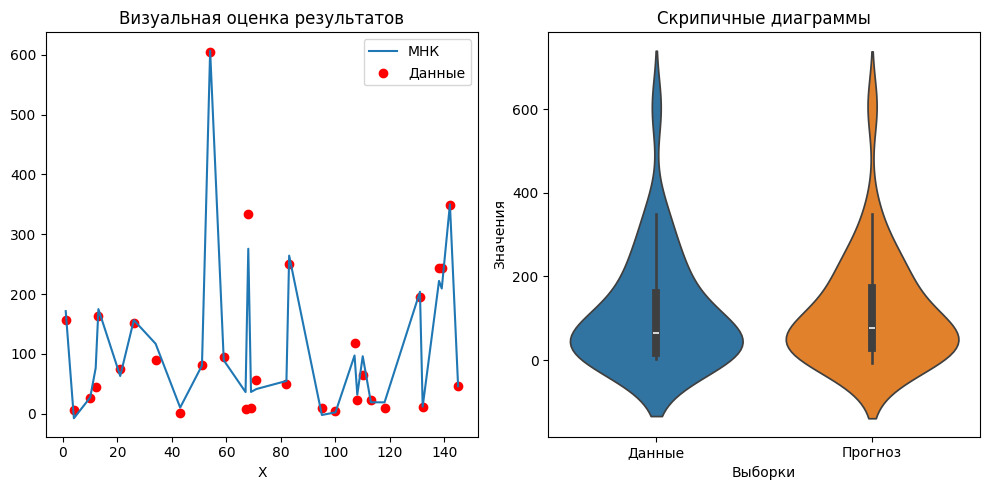

In [ ]:
X = df.drop(columns=['count']).loc[:150]
Y = df['count'].loc[:150]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

model = LinearRegression()
model.fit(np.array(x_train), np.array(y_train))
y_pred = model.predict(np.array(x_test))

results = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred
}, index=x_test.index)

# Сортируем по индексу
results = results.sort_index()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Теперь рисуем
axs[0].plot(results.index, results['y_pred'], label='МНК')
axs[0].scatter(results.index, results['y_true'], color='red', label='Данные')


axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': y_pred
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

### Строим модель

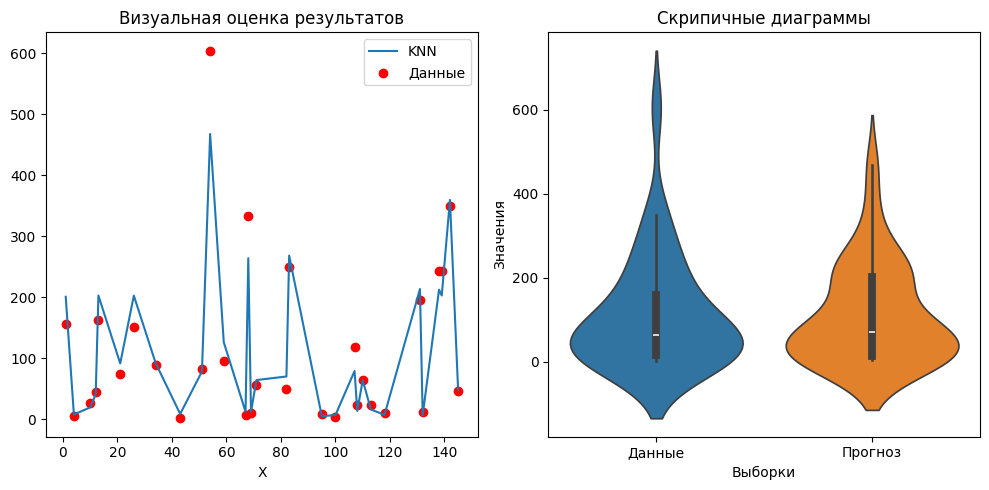

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(np.array(x_train), np.array(y_train))
y_pred_knn = knn_model.predict(np.array(x_test))

# Визуализация результатов для KNN
results_knn = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred_knn
}, index=x_test.index)

results_knn = results_knn.sort_index()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Теперь рисуем
axs[0].plot(results_knn.index, results_knn['y_pred'], label='KNN')
axs[0].scatter(results_knn.index, results_knn['y_true'], color='red', label='Данные')


axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data_knn = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': y_pred_knn
})

sns.violinplot(data=data_knn, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

### Таблица для метрик

In [ ]:
# Метрики для KNN
MSE_knn = mean_squared_error(y_test, y_pred_knn)
RMSE_knn = MSE_knn**0.5
R2_knn = r2_score(y_test, y_pred_knn)
MAE_knn = mean_absolute_error(y_test, y_pred_knn)
MAPE_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

# Метрики для MNK
MSE_mnk = mean_squared_error(y_test, y_pred)
RMSE_mnk = MSE_mnk**0.5
R2_mnk = r2_score(y_test, y_pred)
MAE_mnk = mean_absolute_error(y_test, y_pred)
MAPE_mnk = mean_absolute_percentage_error(y_test, y_pred)

# Создаем таблицу с результатами
results_table = pd.DataFrame({
    'Метрика': ['R²', 'MSE', 'RMSE', 'MAE', 'MAPE'],
    'KNN': [R2_knn, MSE_knn, RMSE_knn, MAE_knn, MAPE_knn],
    'MNK': [R2_mnk, MSE_mnk, RMSE_mnk, MAE_mnk, MAPE_mnk]
})

print(results_table.to_string(index=False))

Метрика         KNN        SVM
     R²    0.932547   0.979202
    MSE 1187.433548 366.131900
   RMSE   34.459158  19.134573
    MAE   20.806452  14.019486
   MAPE    0.357049   0.602766


### Задача классификации

In [ ]:
# Создание целевой переменной для классификации
threshold = Y.median()  # Определяем порог
y_class = (Y > threshold).astype(int)

In [ ]:
# Разделяем на тренировочную и тестовую выборку для классификации
x_train_class = x_train
x_test_class = x_test
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

print("Распределение классов в тренировочной выборке:")
print(y_train_class.value_counts())
print("\nРаспределение классов в тестовой выборке:")
print(y_test_class.value_counts())

Распределение классов в тренировочной выборке:
count
1    63
0    57
Name: count, dtype: int64

Распределение классов в тестовой выборке:
count
0    19
1    12
Name: count, dtype: int64


Модель KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_class, y_train_class)
y_pred_knn = knn_classifier.predict(x_test_class)

Модель SVM

In [ ]:
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(x_train_class, y_train_class)
y_pred_svm = svm_classifier.predict(x_test_class)

График KNN

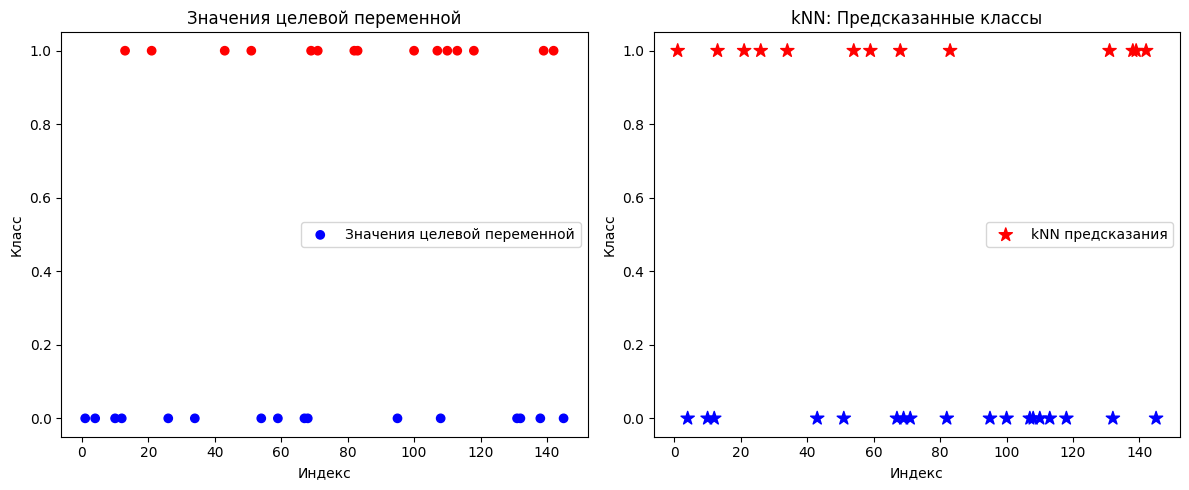

In [ ]:
colors_true = ['blue' if val == 0 else 'red' for val in y_test_class]
colors_knn = ['blue' if val == 0 else 'red' for val in y_pred_knn]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_test_class.index, y_test_class, c=colors_true, label='Значения целевой переменной')
plt.xlabel('Индекс')
plt.ylabel('Класс')
plt.title('Значения целевой переменной')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test_class.index, y_pred_knn, c=colors_knn, marker='*', s=100, label='kNN предсказания')
plt.xlabel('Индекс')
plt.ylabel('Класс')
plt.title('kNN: Предсказанные классы')
plt.legend()

plt.tight_layout()
plt.show()

График SVM

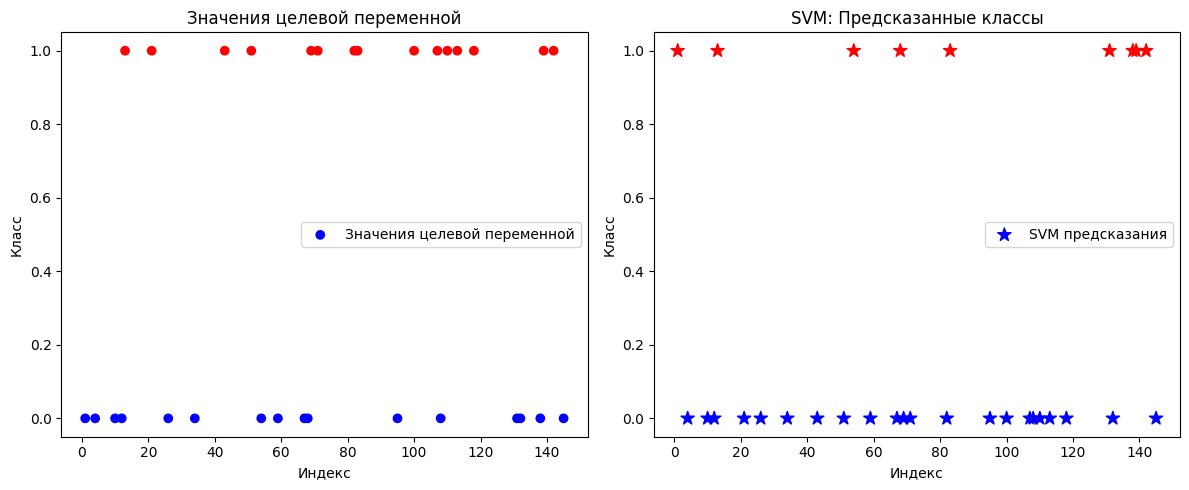

In [ ]:
colors_svm = ['blue' if val == 0 else 'red' for val in y_pred_svm]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_test_class.index, y_test_class, c=colors_true, label='Значения целевой переменной')
plt.xlabel('Индекс')
plt.ylabel('Класс')
plt.title('Значения целевой переменной')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test_class.index, y_pred_svm, c=colors_svm, marker='*', s=100, label='SVM предсказания')
plt.xlabel('Индекс')
plt.ylabel('Класс')
plt.title('SVM: Предсказанные классы')
plt.legend()

plt.tight_layout()
plt.show()